In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [71]:
data = pd.read_csv('Financial_inclusion_dataset.csv')
data.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [72]:
ds = data.copy()

In [73]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [74]:
ds.drop('uniqueid', axis = 1, inplace = True)

In [75]:
ds.isnull().sum()

country                   0
year                      0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [76]:
for i in ds.columns:
    if ((ds[i].isnull().sum() / len(ds)) * 100) < 30:
        if ds[i].dtypes != 'O':
            ds[i].fillna(ds[i].median(), inplace = True)
        else:
            ds[i].fillna(ds[i].mode()[0], inplace = True)
    else:
      ds.drop(i, axis = 1, inplace =True)

ds.isnull().sum()

country                   0
year                      0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [77]:
cat = ds.select_dtypes(exclude = 'number')
num = ds.select_dtypes(include = 'number')

print('Numerical Data')
display(num.head())
print(f'\n\nCategorical Data')
display(cat.head())

Numerical Data


,year,household_size,age_of_respondent
0,2018,3,24
1,2018,5,70
2,2018,5,26
3,2018,5,34
4,2018,8,26




Categorical Data


,country,bank_account,location_type,cellphone_access,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,Yes,Rural,Yes,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,No,Rural,No,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,Yes,Urban,Yes,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,No,Rural,Yes,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,No,Urban,No,Male,Child,Single/Never Married,Primary education,Informally employed


In [78]:
#to know the columns to scale
cols_to_scale = []
for i in num.columns:
    if ds[i].describe()[2] > 1500:
        cols_to_scale.append(i)


cols_to_scale

[]

In [79]:
# to encode categorical datas
from sklearn.preprocessing import LabelEncoder
import joblib

encoded = {}
for i in cat.columns:
    encode = LabelEncoder()
    ds[i] = encode.fit_transform(ds[i])
    joblib.dump(encode, open(f'{i}_encoder.pkl', 'wb'))
    encoded[i + 'encoder'] = encode

encoded

{'countryencoder': LabelEncoder(),
 'bank_accountencoder': LabelEncoder(),
 'location_typeencoder': LabelEncoder(),
 'cellphone_accessencoder': LabelEncoder(),
 'gender_of_respondentencoder': LabelEncoder(),
 'relationship_with_headencoder': LabelEncoder(),
 'marital_statusencoder': LabelEncoder(),
 'education_levelencoder': LabelEncoder(),
 'job_typeencoder': LabelEncoder()}

In [80]:
ds.head()

,country,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,0,2018,1,0,1,3,24,0,5,2,3,9
1,0,2018,0,0,0,5,70,0,1,4,0,4
2,0,2018,1,1,1,5,26,1,3,3,5,9
3,0,2018,0,0,1,5,34,0,1,2,2,3
4,0,2018,0,1,0,8,26,1,0,3,2,5


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

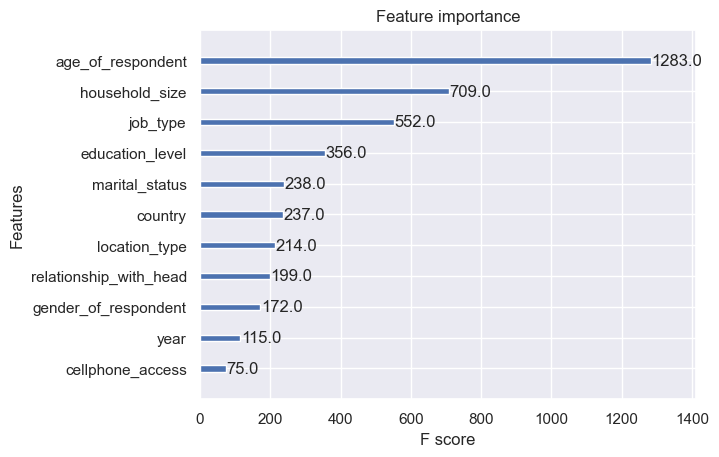

In [81]:
import matplotlib.pyplot as plt
import xgboost as xgb

model = xgb.XGBClassifier()

x= ds.drop('bank_account', axis = 1)
y = ds.bank_account

model.fit(x, y)

#Print feature importance scores
xgb.plot_importance(model, importance_type = 'weight')

In [82]:
sel_cols = ['age_of_respondent', 'household_size', 'job_type', 'education_level','marital_status',
            'country', 'location_type', 'bank_account']

new_data = ds[sel_cols]
new_data.head()

,age_of_respondent,household_size,job_type,education_level,marital_status,country,location_type,bank_account
0,24,3,9,3,2,0,0,1
1,70,5,4,0,4,0,0,0
2,26,5,9,5,3,0,1,1
3,34,5,3,2,2,0,0,0
4,26,8,5,2,3,0,1,0


In [83]:
#------ Modelling ---------
from sklearn.model_selection import train_test_split

x = new_data.drop('bank_account', axis = 1)
y = new_data.bank_account

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.10)
print(f'Xtrain: {xtrain.shape}')
print(f'Xtest: {xtest.shape}')
print(f'Ytrain: {ytrain.shape}')
print(f'Ytest: {ytest.shape}')

Xtrain: (21171, 7)
Xtest: (2353, 7)
Ytrain: (21171,)
Ytest: (2353,)


,age_of_respondent,household_size,job_type,education_level,marital_status,country,location_type,bank_account
657,17,3,8,3,3,0,1,0
14851,75,1,9,0,4,2,1,0
18556,40,4,5,2,3,2,1,0
16215,34,2,9,0,3,2,1,0
21036,33,2,5,2,3,2,1,0
...,...,...,...,...,...,...,...,...
14935,38,3,9,2,3,2,0,0
373,23,6,8,3,3,0,0,0
18834,34,2,3,4,3,2,0,1
7971,33,4,5,2,0,1,0,0


<Axes: xlabel='bank_account', ylabel='count'>

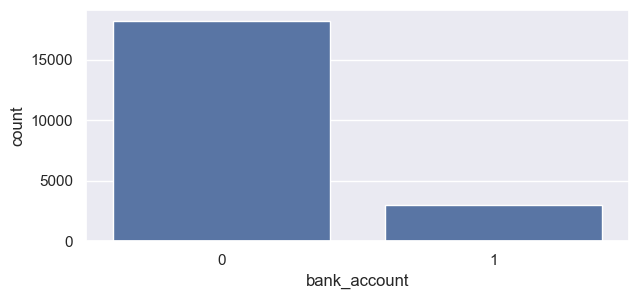

In [84]:
training_data = pd.concat([xtrain, ytrain], axis = 1)
plt.figure(figsize = (7,3))

display(training_data)
sns.countplot(x = training_data['bank_account'])

,age_of_respondent,household_size,job_type,education_level,marital_status,country,location_type,bank_account
7011,38,7,9,2,2,1,0,1
13911,81,3,1,0,4,1,1,1
3024,30,2,3,3,2,0,1,1
5553,55,9,9,3,2,0,1,1
21052,29,3,8,5,3,2,0,1
...,...,...,...,...,...,...,...,...
21928,40,5,9,0,2,3,0,0
17619,57,1,9,2,4,2,1,0
13621,17,6,8,3,3,1,0,0
18712,22,2,9,2,3,2,1,0


<Axes: xlabel='bank_account', ylabel='count'>

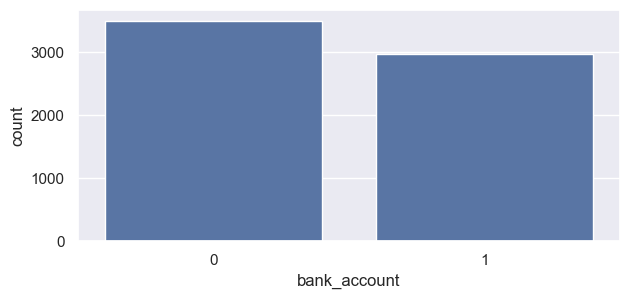

In [85]:
class0 = training_data.loc[training_data['bank_account'] == 0]
class1 = training_data.loc[training_data['bank_account'] == 1]

new_class0 = class0.sample(3500)


new_training_data = pd.concat([class1, new_class0], axis = 0)

display(new_training_data)
plt.figure(figsize = (7,3))
sns.set(style= 'darkgrid')
sns.countplot(x = new_training_data['bank_account'])

In [86]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
xgb_model = xgb.XGBClassifier()

x = new_training_data.drop('bank_account', axis = 1)
y = new_training_data['bank_account']

xgb_model.fit(x, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [87]:
from sklearn.metrics import classification_report

cv = xgb_model.predict(xtest)
print(classification_report(cv, ytest))

              precision    recall  f1-score   support

           0       0.81      0.95      0.87      1712
           1       0.74      0.39      0.51       641

    accuracy                           0.80      2353
   macro avg       0.77      0.67      0.69      2353
weighted avg       0.79      0.80      0.77      2353



In [88]:
#Model Saving
joblib.dump(xgb_model, open('financialinclusionpredictionmodel.pkl','wb'))